## Categorical cross entropy

In [27]:
import numpy as np
import pandas as pd
import tensorflow as tf
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
cd drive/MyDrive/colab/dataset

[Errno 2] No such file or directory: 'drive/MyDrive/colab/dataset'
/content/drive/MyDrive/colab/dataset


In [30]:
iris = pd.read_csv('iris.csv', header = None)
iris

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Preprocessing

In [31]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(iris.iloc[:, -1].values)

In [32]:
# One-hot encoding
from tensorflow.keras.utils import to_categorical
y_onehot = to_categorical(y)
y_onehot[:3]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [33]:
# data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(iris.iloc[:, : -1].values)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, y_onehot, stratify = y_onehot, random_state = seed
)

X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((112, 4), (38, 4), (112, 3), (38, 3))

### 모델 정의 / 설정 / 학습 / 평가

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [36]:
model = Sequential()
model.add(Dense(16, input_dim = 4, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                80        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']
)

#### Setting for saving model

In [38]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [39]:
modelpath = '/content/drive/MyDrive/colab/1. Basic Model/Models/best_iris.h5'
checkpointer = ModelCheckpoint(
    modelpath, monitor = 'val_loss', verbose = 1, save_best_only = True
)
early_stopping = EarlyStopping(patience = 30)

In [40]:
history = model.fit(
    X_train, Y_train, validation_split = 0.2,
    epochs = 2000, batch_size = 30, verbose = 0, callbacks = [checkpointer, early_stopping]
)


Epoch 00001: val_loss improved from inf to 1.15911, saving model to /content/drive/MyDrive/colab/1. Basic Model/Models/best_iris.h5

Epoch 00002: val_loss improved from 1.15911 to 1.15514, saving model to /content/drive/MyDrive/colab/1. Basic Model/Models/best_iris.h5

Epoch 00003: val_loss improved from 1.15514 to 1.15130, saving model to /content/drive/MyDrive/colab/1. Basic Model/Models/best_iris.h5

Epoch 00004: val_loss improved from 1.15130 to 1.14787, saving model to /content/drive/MyDrive/colab/1. Basic Model/Models/best_iris.h5

Epoch 00005: val_loss improved from 1.14787 to 1.14458, saving model to /content/drive/MyDrive/colab/1. Basic Model/Models/best_iris.h5

Epoch 00006: val_loss improved from 1.14458 to 1.14159, saving model to /content/drive/MyDrive/colab/1. Basic Model/Models/best_iris.h5

Epoch 00007: val_loss improved from 1.14159 to 1.13821, saving model to /content/drive/MyDrive/colab/1. Basic Model/Models/best_iris.h5

Epoch 00008: val_loss improved from 1.13821 

#### Evaluation with the best model

In [41]:
from tensorflow.keras.models import load_model
best_model = load_model('/content/drive/MyDrive/colab/1. Basic Model/Models/best_iris.h5')

In [42]:
best_model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.0612 - accuracy: 1.0000


[0.06116105243563652, 1.0]

### Visualization

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
y_acc = history.history['accuracy']
y_vloss = history.history['val_loss']
x_len = np.arange(len(y_acc))

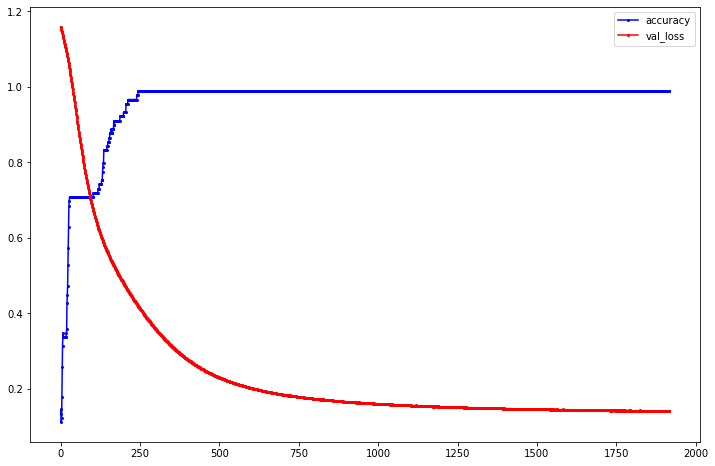

In [45]:
plt.figure(figsize = (12, 8))
plt.plot(x_len, y_acc, 'bo-', markersize = 2, label = 'accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize = 2, label = 'val_loss')
plt.legend()
plt.show()